In [1]:
## This notebook handles the fingerprint calculation of microcystin with smiles notation

In [1]:
## rdkit import
from rdkit import Chem, DataStructs, RDConfig
from rdkit.Chem import AllChem
from rdkit.Chem.Pharm2D import Gobbi_Pharm2D, Generate
from rdkit.Chem import Draw
from rdkit.Chem.Scaffolds.MurckoScaffold import GetScaffoldForMol
from rdkit.Chem.rdmolops import AddHs
from pathlib import Path
from rdkit.Chem import PandasTools


## Utils import
import pandas as pd
import tqdm as tqdm

In [2]:
data = pd.read_excel("MC variants.xlsx")

In [3]:
data_with_smiles = data[~data["SMILES"].isna()]

In [4]:
viz_table = data_with_smiles[["Microcystin","SMILES"]]

In [5]:
PandasTools.AddMoleculeColumnToFrame(viz_table,'SMILES')

C:\Users\saurav\anaconda3\envs\micro2\lib\site-packages\rdkit\Chem\PandasTools.py:371: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  frame[molCol] = frame[smilesCol].map(Chem.MolFromSmiles)


,Microcystin,SMILES,ROMol
0,Microcystin-LR,O=C(O)C2NC(=O)C(C)C(C=CC(=CC(C)C(OC)Cc1ccccc1)...,
1,Microcystin-RR,O=C(O)C2NC(=O)C(C)C(C=CC(=CC(C)C(OC)Cc1ccccc1)...,
2,Microcystin-LA,O=C(O)C2NC(=O)C(C)C(C=CC(=CC(C)C(OC)Cc1ccccc1)...,
3,Microcystin-YR,CC1C(NC(=O)C(NC(=O)C(C(NC(=O)C(NC(=O)C(NC(=O)C...,
4,Microcystin-LY,CC1C(NC(=O)C(NC(=O)C(C(NC(=O)C(NC(=O)C(NC(=O)C...,
5,Microcystin-LF,CC1C(NC(=O)C(NC(=O)C(C(NC(=O)C(NC(=O)C(NC(=O)C...,
6,Microcystin LL,CC1C(NC(=O)C(NC(=O)C(C(NC(=O)C(NC(=O)C(NC(=O)C...,
7,Microcystin-LW,CC1C(NC(=O)C(NC(=O)C(C(NC(=O)C(NC(=O)C(NC(=O)C...,
8,Microcystin YM,CC1C(NC(=O)C(NC(=O)C(C(NC(=O)C(NC(=O)C(NC(=O)C...,
9,Microcystin WR,CC1C(NC(=O)C(NC(=O)C(C(NC(=O)C(NC(=O)C(NC(=O)C...,

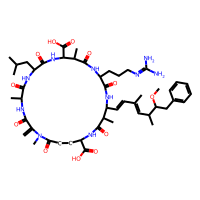
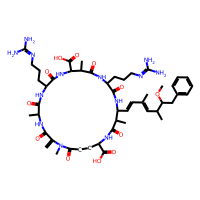
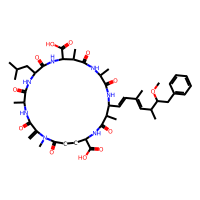
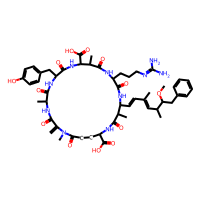
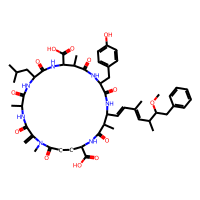
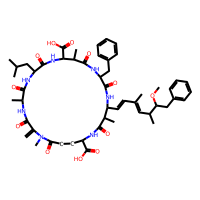
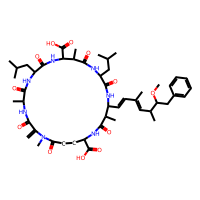
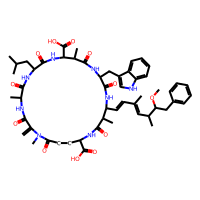
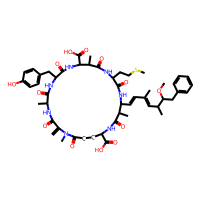
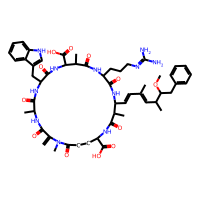
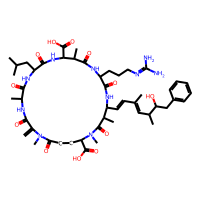
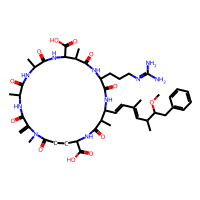
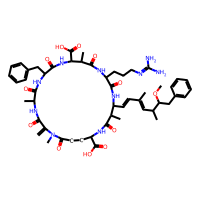
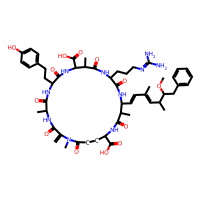

In [6]:
viz_table

In [7]:
MurckoG = []
for each_mol in viz_table["ROMol"]:
    try:
        MurckoG.append(Chem.MolToSmiles(GetScaffoldForMol(each_mol)))
    except:
        MurckoG.append(Chem.MolToSmiles(each_mol))
viz_table["Murcko"] = MurckoG
viz_table["Murcko"].value_counts()

C:\Users\saurav\anaconda3\envs\micro2\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


C=C1NC(=O)CCCNC(=O)CC(C=CC=CCCCc2ccccc2)NC(=O)CNC(=O)CCNC(=O)CNC(=O)CNC1=O                       6
C=C1NC(=O)CCCNC(=O)CC(C=CC=CCCCc2ccccc2)NC(=O)CNC(=O)CCNC(=O)C(Cc2ccccc2)NC(=O)CNC1=O            3
C=C1NC(=O)CCCNC(=O)CC(C=CC=CCCCc2ccccc2)NC(=O)C(Cc2ccccc2)NC(=O)CCNC(=O)CNC(=O)CNC1=O            2
C=C1NC(=O)CCCNC(=O)CC(C=CC=CCCCc2ccccc2)NC(=O)C(Cc2c[nH]c3ccccc23)NC(=O)CCNC(=O)CNC(=O)CNC1=O    1
C=C1NC(=O)CCCNC(=O)CC(C=CC=CCCCc2ccccc2)NC(=O)CNC(=O)CCNC(=O)C(Cc2c[nH]c3ccccc23)NC(=O)CNC1=O    1
C=C1NC(=O)CCCNC(=O)CC(C=CC=CCCCc2ccccc2)NC(=O)CNC(=O)CCNC(=O)C(CCc2ccccc2)NC(=O)CNC1=O           1
Name: Murcko, dtype: int64

In [11]:
cur_scaf_smiles = 'C=C1NC(=O)CCCNC(=O)CC(C=CC=CCCCc2ccccc2)NC(=O)CNC(=O)CCNC(=O)C(Cc2ccccc2)NC(=O)CNC1=O'
cur_scaf_df = viz_table[viz_table["Murcko"]==cur_scaf_smiles]
mol_scaffold_of_interest = Chem.MolFromSmiles(cur_scaf_smiles)

In [12]:
custom_legend = [' : '.join(tup) for tup in list(zip(cur_scaf_df['Microcystin']))]

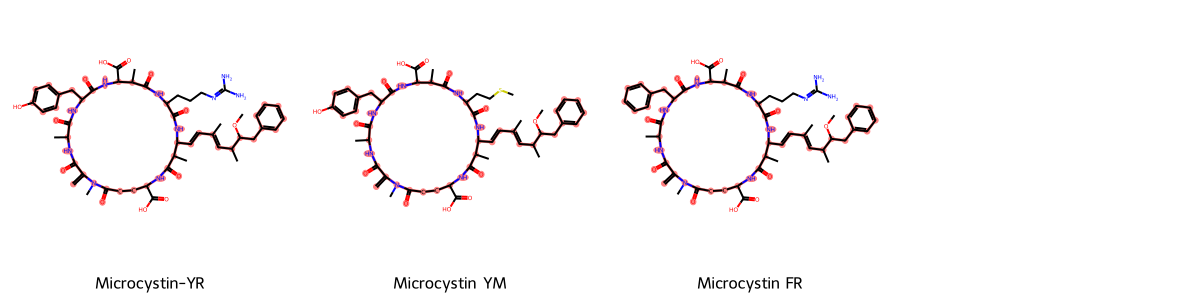

In [13]:
highlight_scaffold = [mMol.GetSubstructMatch(Chem.MolFromSmiles(cur_scaf_smiles)) for mMol in cur_scaf_df['ROMol']]
Draw.MolsToGridImage(cur_scaf_df['ROMol'], 
                     legends = custom_legend,
                     highlightAtomLists = highlight_scaffold, 
                     molsPerRow=4,
                     subImgSize=(300,300), useSVG=False)